# OpenSCADコマンド
OpenSCADはスクリプトで３Dプリンタのモデルを作ることができるCADです。
スクリプトをベースとしているため、モデルを記述してコマンドラインから3Dプリンタ用のSTLファイルを出力することもできます。

以下では、
<a href="https://softsolder.files.wordpress.com/2013/09/practical-solid-modeling-for-3d-printing-with-openscad-2013-09-25.pdf">Practical Solid Modeling For 3D Printing With OpenSCAD</a>
の記事をベースにjupyter notebookを使ってOpenSCADの使い方を紹介します。


## OpenSCADとnumpy-stlのインストール
OpenSCADと生成されたSTLファイルを表示するために、numpy-stlをインストールします。

MacOSXのbrewを使って以下のコマンドでOpenSCADをインストールします。

```bash
$ brew install caskroom/cask/openscad
```

STLファイルを可視化するnumpy-stlは、pipコマンドを使ってインストールします。
```bash
$ pip install numpy-stl
```

後半で使用するpythonからSCADファイルを生成するツールsolidpythonもインストールします。

```bash
$ pip install solidpython
```

### 前準備
jupyter NotebookでSTLファイルを表示するため、必要なモジュールをインポートします。

In [1]:
%matplotlib notebook

from stl import mesh
from mpl_toolkits import mplot3d
from matplotlib import pyplot as plt


また、STLファイルを表示するための関数としてPlotStlを定義します。

In [2]:
def PlotStl(stlFile):
    # Create a new plot
    figure = plt.figure(figsize=(6,4))
    axes = mplot3d.Axes3D(figure)

    # Load the STL files and add the vectors to the plot
    your_mesh = mesh.Mesh.from_file(stlFile)
    axes.add_collection3d(mplot3d.art3d.Poly3DCollection(your_mesh.vectors))

    # Auto scale to the mesh size
    #scale = your_mesh.points.flatten(-1)
    scale = your_mesh.points.flatten(order='C')
    axes.auto_scale_xyz(scale, scale, scale)

    # Show the plot to the screen
    plt.show()

使い方は引数に表示させたいSTLファイルを指定するだけです。

<IPython.core.display.Javascript object>


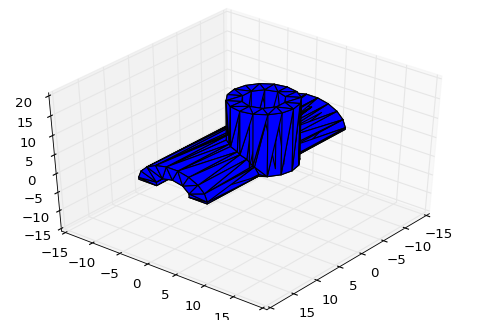

In [3]:
PlotStl('models/example.stl')

## サンプルモデル
上記のSTLファイルは、
<a href="https://softsolder.files.wordpress.com/2013/09/practical-solid-modeling-for-3d-printing-with-openscad-2013-09-25.pdf">Practical Solid Modeling For 3D Printing With OpenSCAD</a>
の例題で、以下の内容をOpenSCADで３Dモデル化してSTLファイルに出力したものです。

In [4]:
%cat models/example.scad

difference() {   
    union() {    
    translate([0,3.4,0])
        color("lightgreen")
            cylinder(r=5.0,h=16.0);
    translate([-15.0,0,0])
        rotate([0,90,0])
            color("lightyellow")
                cylinder(r=6.0,h=30.0);
    }
    
    translate([0,3.4,-15.0])
        cylinder(r=3.0,h=3*15.0);
    translate([-30.0,0,0])
        rotate([0,90,0])
            cylinder(r=3.0,h=2*30.0);
    translate([0,0,-5.0])
        cube([50,50,10.0],center=true);
}


### 3Dプリンタ出力
example.stlを手元の３Dプリンタ（2万円で購入できるダビンチNano）で出力してみました。２２分程度で完成しました。

<img src="images/27/sample_3Dout.png" width="300px"/>

## OpenSCADの初歩
OpenSCADの最初の例としてcube関数で直方体を作ってみましょう。


%%writefileコマンドを使ってmodelsディレクトリにex_1.scadファイルを作ります。

In [5]:
%%writefile models/ex_1.scad
cube([30, 20, 10], center=true);

Overwriting models/ex_1.scad


次に、%%bashコマンドでopenscadを起動して、scadファイルからSTLファイルを生成します。

%%bashのみでは、CGALの情報がたくさんでるので、以降の例では --err /dev/nullオプションを付けてstderrの出力を抑制することにします。

In [6]:
%%bash 
openscad -o models/ex_1.stl models/ex_1.scad

CGAL Cache insert: cube(size=[30,20,10],center=true); (10872 bytes)
CGAL Cache insert: group(){cube(size=[30,20,10],center=true (10872 bytes)


生成されたSTLファイルをPlotStlで表示すれば、期待した通りの直方体が生成されたことを確認できます。

<IPython.core.display.Javascript object>


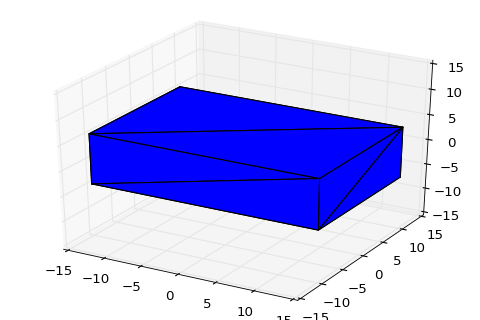

In [7]:
PlotStl('models/ex_1.stl')

次は、円柱（cylinder）を作ります。

In [8]:
%%writefile models/ex_2.scad
cylinder(r=20, h=100, center=true);

Overwriting models/ex_2.scad


In [9]:
%%bash --err /dev/null
openscad -o models/ex_2.stl models/ex_2.scad

<IPython.core.display.Javascript object>


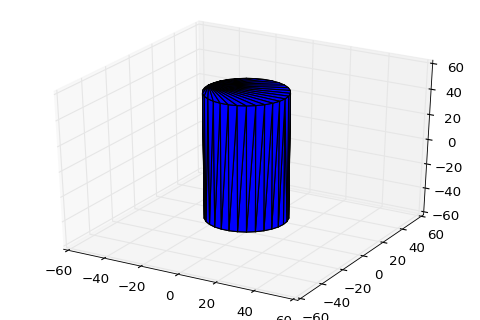

In [10]:
PlotStl('models/ex_2.stl')

$fnでcylinderの側面の数をしていすることができます。

$fn=3を指定すると、３角柱となります。

```
cylinder(r=20, h=100, center=true, $fn=3);
```

In [11]:
%%writefile models/ex_3.scad
cylinder(r=20, h=100, center=true, $fn=3);

Overwriting models/ex_3.scad


In [12]:
%%bash --err /dev/null
openscad -o models/ex_3.stl models/ex_3.scad

<IPython.core.display.Javascript object>


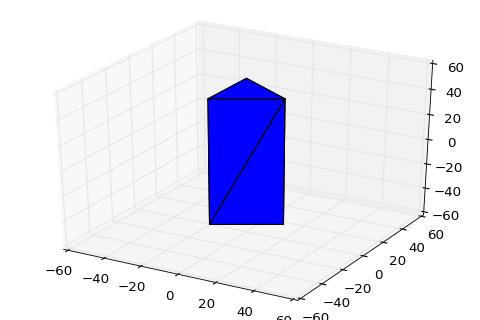

In [13]:
PlotStl('models/ex_3.stl')

## 図形の演算
OpenSCADが提供している図形の演算は、以下の通りです。
- 図形の和: union
- 図形の差: difference
- 図形の積（重なる部分を抽出）: intersection

次の例は、立方体（cube）と円柱（cyliner）の和をとったものです。

In [14]:
%%writefile models/ex_4.scad
union() {
    cube(50, center=true);
    cylinder(r=20, h=100, center=true);
}

Overwriting models/ex_4.scad


In [15]:
%%bash --err /dev/null
openscad -o models/ex_4.stl models/ex_4.scad

<IPython.core.display.Javascript object>


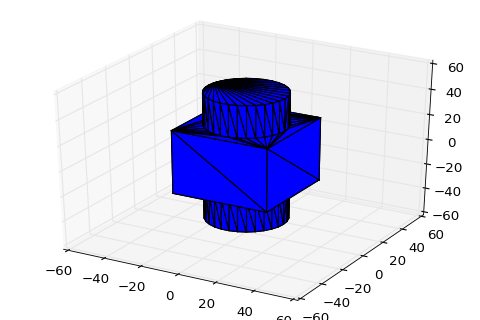

In [16]:
PlotStl('models/ex_4.stl')

次に、立方体から円柱を引いた図形を描いて見ます。立方体に円柱の穴が空いています。

In [17]:
%%writefile models/ex_5.scad
difference() {
    cube(50, center=true);
    cylinder(r=20, h=100, center=true);
}

Overwriting models/ex_5.scad


In [18]:
%%bash --err /dev/null
openscad -o models/ex_5.stl models/ex_5.scad

<IPython.core.display.Javascript object>


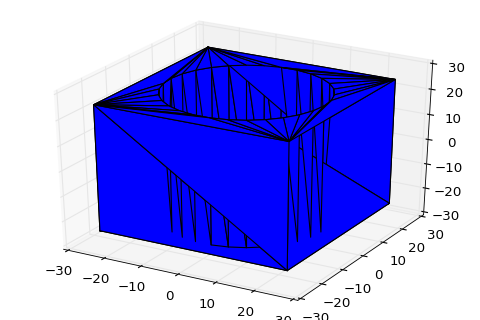

In [19]:
PlotStl('models/ex_5.stl')

GUI版のOpenSCADでは、differenceで引いたオブジェクトをViewメニューのThrow togetherで表示することができます。

引く順序を変えると変な図形になります。

In [20]:
%%writefile models/ex_6.scad
difference() {
    cylinder(r=20, h=100, center=true);
    cube(50, center=true);
}

Overwriting models/ex_6.scad


In [21]:
%%bash --err /dev/null
openscad -o models/ex_6.stl models/ex_6.scad

<IPython.core.display.Javascript object>


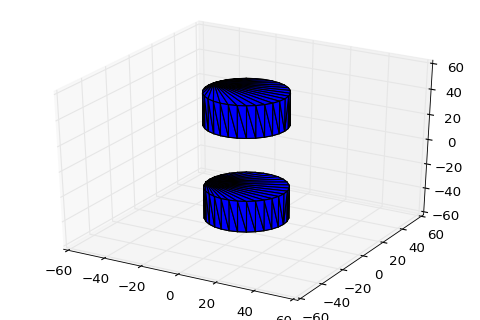

In [22]:
PlotStl('models/ex_6.stl')

図形の重なった部分のみを表示するのが、intersectionです。

In [23]:
%%writefile models/ex_7.scad
intersection() {
    cube(50, center=true);
    cylinder(r=20, h=100, center=true);
}

Overwriting models/ex_7.scad


In [24]:
%%bash --err /dev/null
openscad -o models/ex_7.stl models/ex_7.scad

<IPython.core.display.Javascript object>


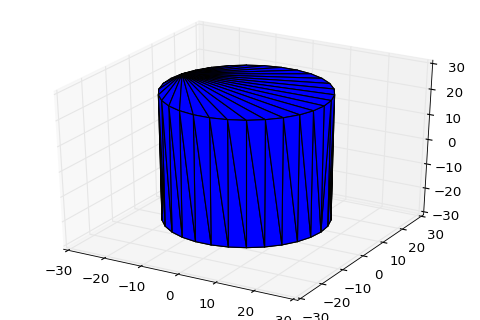

In [25]:
PlotStl('models/ex_7.stl')

### 移動と回転
平行移動は、対象とする図形の前に、translate関数を付けて指定します。

In [59]:
%%writefile models/ex_8.scad
translate([0,3.4,0])
  cylinder(r=5.0, h=16.0);

Writing models/ex_8.scad


In [23]:
%%bash --err /dev/null
openscad -o models/ex_8.stl models/ex_8.scad

<IPython.core.display.Javascript object>


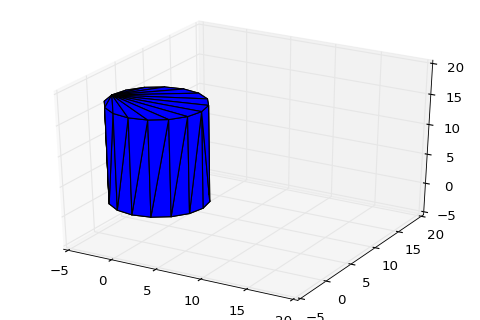

In [24]:
PlotStl('models/ex_8.stl')

同様に回転は、対象とする図形の前に、rotate関数を付けて指定します。

In [26]:
%%writefile models/ex_9.scad
translate([0,3.4,0])
  cylinder(r=5.0, h=16.0);
translate([-15.0,0,0])
  rotate([0,90,0])
    cylinder(r=6.0, h=30.0);

Overwriting models/ex_9.scad


In [27]:
%%bash --err /dev/null
openscad -o models/ex_9.stl models/ex_9.scad

<IPython.core.display.Javascript object>


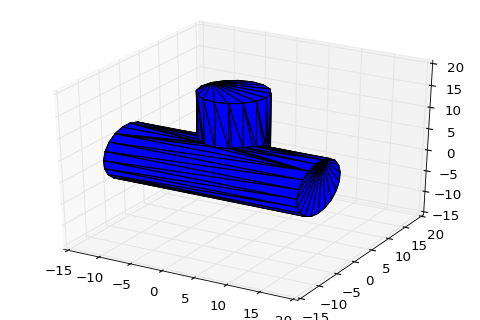

In [28]:
PlotStl('models/ex_9.stl')

円柱に穴を開けて、最初の例題に近づけてみましょう。

In [29]:
%%writefile models/ex_10.scad
difference() {
    union() {
        translate([0,3.4,0])
          cylinder(r=5.0, h=16.0);
        translate([-15.0,0,0])
          rotate([0,90,0])
            cylinder(r=6.0, h=30.0);        
    }
    
    translate([0, 3.4, -15.0])
        cylinder(r=3.0, h=3*15.0);
    translate([-30.0, 0,0])
        rotate([0,90,0])
            cylinder(r=3.0, h=2*30.0);
}


Overwriting models/ex_10.scad


In [30]:
%%bash --err /dev/null
openscad -o models/ex_10.stl models/ex_10.scad 

<IPython.core.display.Javascript object>


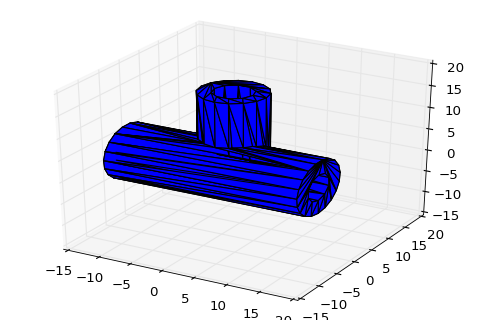

In [31]:
PlotStl('models/ex_10.stl')

## 便利なライブラリ
OpenSCADの便利なライブラリが以下のサイトに紹介されています。

- https://ja.wikibooks.org/wiki/OpenSCAD_User_Manual/Libraries

### MCADのインストール
OpenSCADのライブラリは、ホームディレクトリの.local/share/OpenSCAD/librariesに置きます。

以下のコマンドを実行してMCADライブラリをインストールしてください。
```bash
mkdir -p $HOME/.local/share/OpenSCAD/libraries
cd $HOME/.local/share/OpenSCAD/libraries
git clone https://github.com/SolidCode/MCAD.git
```

## 角の丸い直方体

MCADには、便利な図形が追加されています。

2次元基本図形
- roundedSQuare: 角の丸い四角形
- ellipse: 楕円:

２次元図形から垂直に持ち上げて３次元図形を生成するのに、linear_extrudeを使用します。

In [32]:
%%writefile models/mcad_roundSquare.scad
use <MCAD/2Dshapes.scad>
use <MCAD/boxes.scad>

//  # 角の丸い四角形
linear_extrude(height=10)
    roundedSquare(pos=[30,30],r=5);
// # 同様の図形をroundedBoxで表示、原点を中心に表示しているので、Z軸がずれる
translate([70, 0, 0])
    roundedBox([30, 30, 10], 5, true);
    
// # 楕円    
translate([0, 70, 0])
    linear_extrude(height=10)
        ellipse(50,75);

Overwriting models/mcad_roundSquare.scad


OpenSCADのWikiでは、linuxのOpenSCADのライブラリ置き場は、$HOME/.local/share/OpenSCAD/librariesだと書いてあるのですが、ライブラリが見つからないので、OPENSCADPATHでライブラリの場所を指定しています。

In [33]:
%%bash --err /dev/null
export OPENSCADPATH=$HOME/.local/share/OpenSCAD/libraries
openscad -o models/mcad_roundSquare.stl models/mcad_roundSquare.scad 

<IPython.core.display.Javascript object>


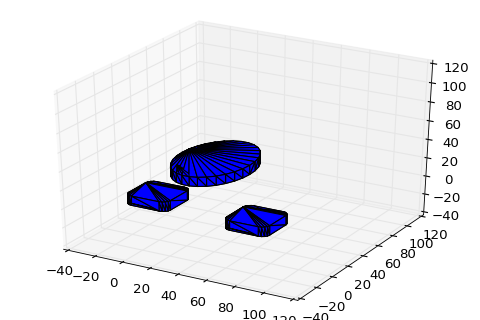

In [34]:
PlotStl('models/mcad_roundSquare.stl')

MCADには、ギアを作る関数が提供されており、簡単にオリジナルのギアを作ることができます。

In [35]:
%%writefile models/gear_sample.scad
use <MCAD/involute_gears.scad>

gear (number_of_teeth=6,  // 歯車の数
    circular_pitch=300,
    hub_diameter=0,
    rim_width=5,
    rim_thickness=5,              // 外側の
    ressure_angle=31);
rotate ([0,0,360*5/6])
translate ([22.5,0,0])
gear (number_of_teeth=21,// 歯車の数
    circular_pitch=300,
    bore_diameter=5,            // 中心の穴の直径
    hub_diameter=10,           // 中心部の直径
    hub_thickness=5,             // 中心部の厚さ
    rim_width=1,                     // 外側の厚さ
    rim_thickness=5,              // 外側の厚さ
    gear_thickness=3,            //ギアの厚さ
    pressure_angle=31);

Overwriting models/gear_sample.scad


In [36]:
%%bash --err /dev/null
export OPENSCADPATH=$HOME/.local/share/OpenSCAD/libraries
openscad -o models/gear_sample.stl models/gear_sample.scad 

<IPython.core.display.Javascript object>


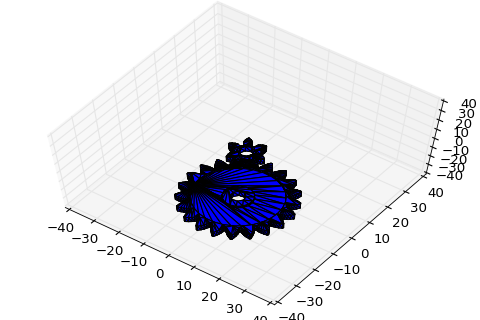

In [37]:
PlotStl('models/gear_sample.stl')

### DXFファイルから図形を作る
OpenSCADでは、DXFファイルで定義されて平面図形から３次元オブジェクトを作ることができます。

以下の例では、example009.dxfファイルのfan_topレイヤーの図形を垂直に突き出した図形を出力します。

<img src="images/27/onShape_view_example009_dxf.png" width="400px"/>

In [38]:
%%writefile models/dxf_sample.scad
linear_extrude(height = 20, center = true, convexity = 10)
   import (file = "example009.dxf", layer = "fan_top");

Overwriting models/dxf_sample.scad


In [39]:
%%bash --err /dev/null
openscad -o models/dxf_sample.stl models/dxf_sample.scad 

<IPython.core.display.Javascript object>


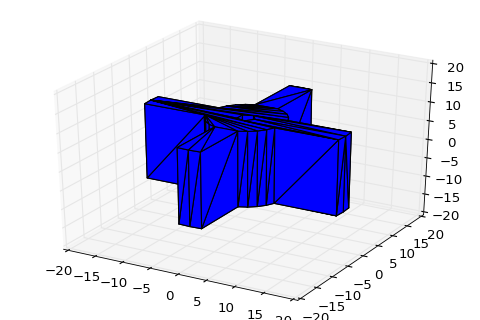

In [40]:
PlotStl('models/dxf_sample.stl')

## PythonでOpenSCADのモデルを作る
OpenSCADにも関数や変数、FORループ、IF文などが用意されていますが、言語処理系としては十分ではありません。

そこで、PythonでOpenSCADのモデルを作ろうとするライブラリがsolidpythonです。

最初にsolidpythonをインポートします。

In [41]:
from solid import *
from solid.utils import *

一片が5mmの立方体と半径5mmの球を(5,0,0)に配置してunionを取り、そこから半径2mm, 高さ6mmの円柱を引いた図形を変数dにセットします。

scad_render関数に図形dを渡すとOpenSCADの構文に変換されます。

In [39]:
d = cube(5) + right(5)(sphere(5)) - cylinder(r=2, h=6)
print scad_render(d)



difference() {
	union() {
		cube(size = 5);
		translate(v = [5, 0, 0]) {
			sphere(r = 5);
		}
	}
	cylinder(h = 6, r = 2);
}


図形をファイルに出力する場合には、scad_render_to_file関数を使用します。

In [40]:
scad_render_to_file(d, "models/solid_ex1.scad")

True

できた図形をOpenSCADを使ってSTLファイルに変換し、PlotStl関数で可視化してみましょう。

In [41]:
%%bash --err /dev/null
openscad -o models/solid_ex1.stl models/solid_ex1.scad 

<IPython.core.display.Javascript object>


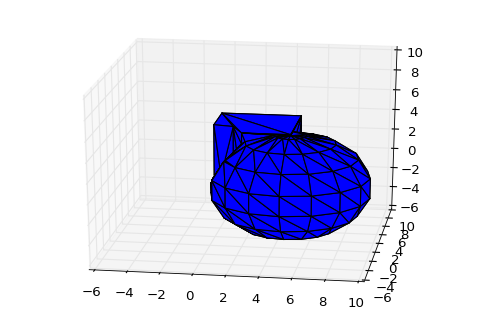

In [42]:
PlotStl('models/solid_ex1.stl')

scadのライブラリを呼び出し、そのまま使うことができます。

SolidPythonでは、図形の演算を以下のように四則演算子を使って表現できます。

- union: +
- diffrence: -
- intersection: *

また、図形の移動はright, left, foward, backward, up, downを使って指定できるようになっています。
- X軸：right, left
- Y軸：foward, backward
- Z軸: up, down

### OpenSCADで作ったモデルをSolidpythonで記述
先ほど、OpenSCADで作ったモデルをSolidpythonで書いてみると以下のようになります。とても短くなりました。

In [43]:
a = forward(3.4)(cylinder(r=5, h=16)) + left(15)(rotate([0, 90, 0])(cylinder(r=6, h=30)))
b = translate([0, 3.4, -15])(cylinder(r=3, h=3*15)) 
c = left(30)(rotate([0,90,0])(cylinder(r=3, h=2*30)))
print scad_render(a - (b + c))



difference() {
	union() {
		translate(v = [0, 3.4000000000, 0]) {
			cylinder(h = 16, r = 5);
		}
		translate(v = [-15, 0, 0]) {
			rotate(a = [0, 90, 0]) {
				cylinder(h = 30, r = 6);
			}
		}
	}
	union() {
		translate(v = [0, 3.4000000000, -15]) {
			cylinder(h = 45, r = 3);
		}
		translate(v = [-30, 0, 0]) {
			rotate(a = [0, 90, 0]) {
				cylinder(h = 60, r = 3);
			}
		}
	}
}


In [44]:
scad_render_to_file(a - (b + c), filepath="models/solid_ex2.scad")

True

In [45]:
%%bash --err /dev/null
openscad -o models/solid_ex2.stl models/solid_ex2.scad 

<IPython.core.display.Javascript object>


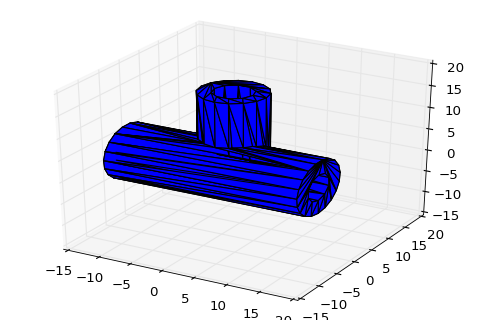

In [46]:
PlotStl('models/solid_ex2.stl')